                                                        # Métodos Computacionales

#Problemas Parcial 2. 

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from scipy import integrate
import math 
from mpl_toolkits.mplot3d import axes3d
sym.init_printing(use_unicode=True)

x = sym.Symbol('x',real=True)
y = sym.Symbol('y',real=True)

#5 Ejercicio de Raíces de Polinomios

In [2]:
def GetLaguerreRecursive(n,x):

    if n==0:
        poly = sym.Number(1)
    elif n==1:
        poly = 1 - x
    else:
        poly = ((2*(n-1)+1-x)*GetLaguerreRecursive(n-1,x)-(n-1)*GetLaguerreRecursive(n-2,x))/n

    return sym.expand(poly,x)

def GetDLaguerre(n,x):
    Pn = GetLaguerreRecursive(n,x)
    return sym.diff(Pn,x,1)

def GetNewton(f,df,xn,itmax=10000,precision=1e-5):

    error = 1.
    it = 0

    while error >= precision and it < itmax:

        try:

            xn1 = xn - f(xn)/df(xn)

            error = np.abs(f(xn)/df(xn))

        except ZeroDivisionError:
            print('Zero Division')

        xn = xn1
        it += 1

    if it == itmax:
        return False
    else:
        return xn

def GetRoots(f,df,x,tolerancia = 5):

    Roots = np.array([])

    for i in x:

        root = GetNewton(f,df,i)

        if  type(root)!=bool:
            croot = np.round( root, tolerancia )

            if croot not in Roots:
                Roots = np.append(Roots, croot)

    Roots.sort()

    return Roots


def GetAllRootsGLag(n):

    xn = np.linspace(0,n + (n-1)*math.sqrt(n), 1000)

    Laguerre = []
    DLaguerre = []

    for i in range(n+1):
        Laguerre.append(GetLaguerreRecursive(i,x))
        DLaguerre.append(GetDLaguerre(i,x))

    poly = sym.lambdify([x],Laguerre[n],'numpy')
    Dpoly = sym.lambdify([x],DLaguerre[n],'numpy')
    Roots = GetRoots(poly,Dpoly,xn)

    if len(Roots) != n:
        ValueError('El número de raíces debe ser igual al n del polinomio.')

    return Roots

def GetWeightsGLag(n):

    Roots = GetAllRootsGLag(n)

    

    Laguerre = []
    
    for i in range(n+2):
        Laguerre.append(GetLaguerreRecursive(i,x))
    
    poly = sym.lambdify([x],Laguerre[n+1],'numpy')
    Weights = Roots/(((n+1)**2)*(poly(Roots))**2)
    
    return Weights

n = 20
raices = GetAllRootsGLag(n)
pesos=GetWeightsGLag(n)
funcion = lambda x: (math.e**x/(math.factorial(n)))*sym.diff((math.e**(-x))*(x**n),x,n)


print("Las raíces reales de los primeros 20 polinomios de Laguerre son: ")
print(raices)
print("\n")
print("Los pesos de los primeros 20 polinomios de Laguerre son: ")
print(pesos)




Las raíces reales de los primeros 20 polinomios de Laguerre son: 
[ 0.07054  0.37213  0.91658  1.70731  2.7492   4.04893  5.61517  7.45902
  9.59439 12.0388  14.81429 17.9489  21.47879 25.4517  29.93255 35.01343
 40.83306 47.61999 55.8108  66.52442]


Los pesos de los primeros 20 polinomios de Laguerre son: 
[1.68735983e-01 2.91152280e-01 2.66711186e-01 1.65988625e-01
 7.48252337e-02 2.49632327e-02 6.20277596e-03 1.14494636e-03
 1.55743683e-04 1.54015743e-05 1.08649671e-06 5.33006738e-08
 1.75797544e-09 3.72551832e-11 4.76756116e-13 3.37286128e-15
 1.15501103e-17 1.53952769e-20 5.28642612e-24 1.65645307e-28]


                                                        #Ejercicios de Integración 

Preguntas 1 y 3: La resolución de estas preguntas se encuentra de manera escrita en las imágenes del repositorio.

Pregunta #6:

Trapecio sin funciones de tipo "Clase"

In [3]:
n=5
error_=1
Integral_exacta=(1/2 - (7/100)*np.sqrt(51))*np.pi
a=0.01
R=0.5
while error_>=0.005:

    a=0.01
    R=0.5
    f = lambda x: np.sqrt(a**2-x**2)/(R+x)
    x=np.linspace(-a, a, n)
    I=integrate.trapezoid(f(x),x)
    error_= (abs(I-Integral_exacta)/Integral_exacta)
    n+=1
    
x=np.linspace(-a, a, n)
f = lambda x: np.sqrt(a**2-x**2)/(R+x)
I=integrate.trapezoid(f(x),x)
print("La intregal calculada mediante el método del trapecio es: " +str(I)+" con un error de: " +str(error_))

La intregal calculada mediante el método del trapecio es: 0.00031271465448587084 con un error de: 0.004894762521392403


Simpson 1/3 sin funciones de tipo "Clase"

In [4]:
R=0.5
a=0.01
n=5
I_exact=np.pi*(R-np.sqrt((R**2)-(a**2)))
f2 = lambda x: (np.sqrt((a**2)-(x**2)))/(R+x)
error_=10.


while error_>=0.005:
    x=np.linspace(-a,a,n)
    I_estimate=integrate.simpson(f2(x),x)
    error_=abs(I_estimate-I_exact)/I_exact
    n+=1



x=np.linspace(-a,a,n+1)
f2 = lambda x: (np.sqrt((a**2)-(x**2)))/(R+x)
I_estimate=integrate.simpson(f2(x),x)
error_=abs(I_estimate-I_exact)/I_exact

print("La intregal calculada mediante el método de simpson 1/3 es: " +str(I_estimate)+" con un error de: " +str(error_))

La intregal calculada mediante el método de simpson 1/3 es: 0.00031292648126804787 con un error de: 0.004023691192068712


Pregunta #7: Una forma de generalizar el método de integración del trapecio para una integral doble...

C:\Users\gaboe\AppData\Local\Temp\ipykernel_15088\1719799846.py:11: RuntimeWarning: invalid value encountered in sqrt
  z=np.sqrt(-(x**2) - (y**2)+(R**2))


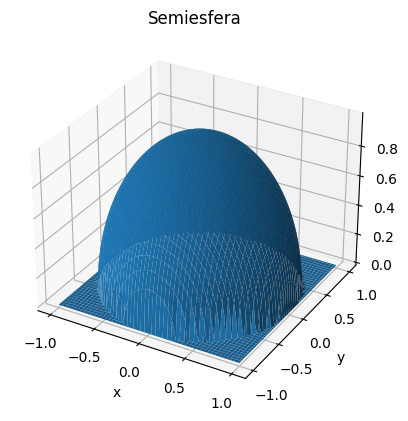

In [5]:
R=1
n=100
x=np.linspace(-R,R,n)
y=np.linspace(-R,R,n)
paso=(2*R)/n

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

def formula_semiesfera(x,y):
    z=np.sqrt(-(x**2) - (y**2)+(R**2))
    if z<= 1:
        z
    else:
        z=0
    return z


def volumen_semiesfera (R,n):
    for i in range(n):
        for j in range(n):
            x_1 = -R + i * paso
            y_1 = -R + j * paso
            x_2 = x_1 + paso
            y_2 = y_1 + paso
            prom_vertices=(formula_semiesfera(x_1,y_1)+formula_semiesfera(x_1,y_2)+formula_semiesfera(x_2,y_1)+formula_semiesfera(x_2,y_2))/4
            volumen=prom_vertices*(paso**2)
    return volumen


X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)

for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        Z[i, j] = formula_semiesfera(X[i, j], Y[i, j])


ax.plot_surface(X, Y, Z)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Semiesfera')
plt.show()

Pregunta #10: La resolción de esta pregunta se encuentra de menera escrita en las imágenes del repositorio.

Pregunta #17:

17. A. 

In [6]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from scipy import integrate
import math 
from mpl_toolkits.mplot3d import axes3d
sym.init_printing(use_unicode=True)

x = sym.Symbol('x',real=True)
y = sym.Symbol('y',real=True)


def GetLaguerreRecursive(n,x):

    if n==0:
        poly = sym.Number(1)
    elif n==1:
        poly = 1 - x
    else:
        poly = ((2*(n-1)+1-x)*GetLaguerreRecursive(n-1,x)-(n-1)*GetLaguerreRecursive(n-2,x))/n

    return sym.expand(poly,x)

def GetDLaguerre(n,x):
    Pn = GetLaguerreRecursive(n,x)
    return sym.diff(Pn,x,1)

def GetNewton(f,df,xn,itmax=10000,precision=1e-5):

    error = 1.
    it = 0

    while error >= precision and it < itmax:

        try:

            xn1 = xn - f(xn)/df(xn)

            error = np.abs(f(xn)/df(xn))

        except ZeroDivisionError:
            print('Zero Division')

        xn = xn1
        it += 1

    if it == itmax:
        return False
    else:
        return xn

def GetRoots(f,df,x,tolerancia = 5):

    Roots = np.array([])

    for i in x:

        root = GetNewton(f,df,i)

        if  type(root)!=bool:
            croot = np.round( root, tolerancia )

            if croot not in Roots:
                Roots = np.append(Roots, croot)

    Roots.sort()

    return Roots


def GetAllRootsGLag(n):

    xn = np.linspace(0,n + (n-1)*math.sqrt(n), 1000)

    Laguerre = []
    DLaguerre = []

    for i in range(n+1):
        Laguerre.append(GetLaguerreRecursive(i,x))
        DLaguerre.append(GetDLaguerre(i,x))

    poly = sym.lambdify([x],Laguerre[n],'numpy')
    Dpoly = sym.lambdify([x],DLaguerre[n],'numpy')
    Roots = GetRoots(poly,Dpoly,xn)

    if len(Roots) != n:
        ValueError('El número de raíces debe ser igual al n del polinomio.')

    return Roots

def GetWeightsGLag(n):

    Roots = GetAllRootsGLag(n)

    

    Laguerre = []
    
    for i in range(n+2):
        Laguerre.append(GetLaguerreRecursive(i,x))
    
    poly = sym.lambdify([x],Laguerre[n+1],'numpy')
    Weights = Roots/(((n+1)**2)*(poly(Roots))**2)
    
    return Weights
n = 3
raices = GetAllRootsGLag(n)
pesos=GetWeightsGLag(n)
funcion = lambda x: ((x**3)/((math.e**x)-1))/(math.e**(-x))
Roots=GetAllRootsGLag(n)
pesos=GetWeightsGLag(n)

I = 0
for i in range(n):
    I += pesos[i]*funcion(raices[i])
    
print("El valor de la intergal mediante cuadratura de Laguerre es: "+str(I) +", Lo cual se acerca bastante al valor real de (pi**4)/15")




El valor de la intergal mediante cuadratura de Laguerre es: 6.481132464522558, Lo cual se acerca bastante al valor real de (pi**4)/15


17. B.

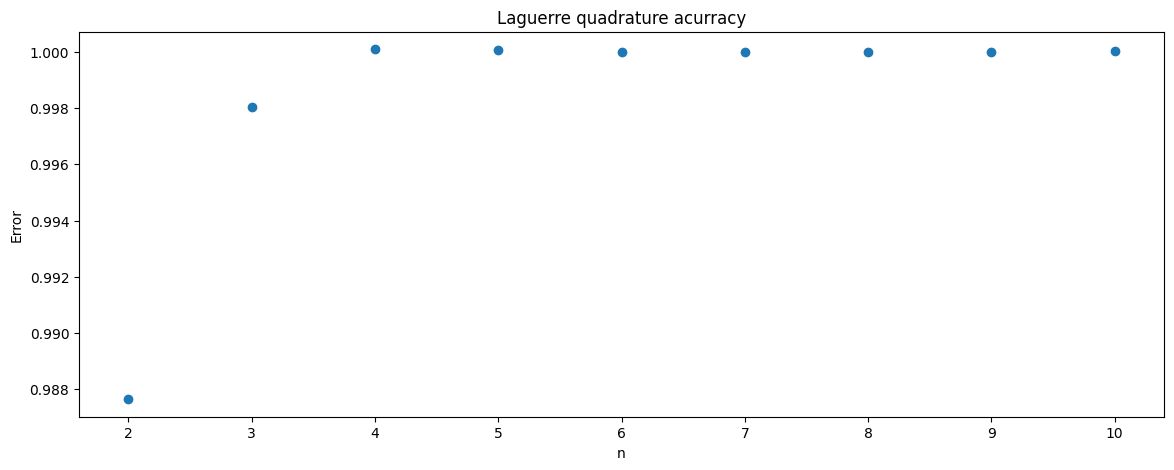

In [7]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from scipy import integrate
import math 
from mpl_toolkits.mplot3d import axes3d
sym.init_printing(use_unicode=True)

x = sym.Symbol('x',real=True)
y = sym.Symbol('y',real=True)

error=[]
for r in range(2, 11):
    
    def GetLaguerreRecursive(n,x):

        if n==0:
            poly = sym.Number(1)
        elif n==1:
            poly = 1 - x
        else:
            poly = ((2*(n-1)+1-x)*GetLaguerreRecursive(n-1,x)-(n-1)*GetLaguerreRecursive(n-2,x))/n

        return sym.expand(poly,x)

    def GetDLaguerre(n,x):
        Pn = GetLaguerreRecursive(n,x)
        return sym.diff(Pn,x,1)

    def GetNewton(f,df,xn,itmax=10000,precision=1e-5):

        error = 1.
        it = 0

        while error >= precision and it < itmax:

            try:

                xn1 = xn - f(xn)/df(xn)

                error = np.abs(f(xn)/df(xn))

            except ZeroDivisionError:
                print('Zero Division')

            xn = xn1
            it += 1

        if it == itmax:
            return False
        else:
            return xn

    def GetRoots(f,df,x,tolerancia = 5):

        Roots = np.array([])

        for i in x:

            root = GetNewton(f,df,i)

            if  type(root)!=bool:
                croot = np.round( root, tolerancia )

                if croot not in Roots:
                    Roots = np.append(Roots, croot)

        Roots.sort()

        return Roots


    def GetAllRootsGLag(n):

        xn = np.linspace(0,n + (n-1)*math.sqrt(n), 1000)

        Laguerre = []
        DLaguerre = []

        for i in range(n+1):
            Laguerre.append(GetLaguerreRecursive(i,x))
            DLaguerre.append(GetDLaguerre(i,x))

        poly = sym.lambdify([x],Laguerre[n],'numpy')
        Dpoly = sym.lambdify([x],DLaguerre[n],'numpy')
        Roots = GetRoots(poly,Dpoly,xn)

        if len(Roots) != n:
            ValueError('El número de raíces debe ser igual al n del polinomio.')

        return Roots

    def GetWeightsGLag(n):

        Roots = GetAllRootsGLag(n)

        

        Laguerre = []
        
        for i in range(n+2):
            Laguerre.append(GetLaguerreRecursive(i,x))
        
        poly = sym.lambdify([x],Laguerre[n+1],'numpy')
        Weights = Roots/(((n+1)**2)*(poly(Roots))**2)
        
        return Weights

    n=r
    raices = GetAllRootsGLag(n)
    pesos=GetWeightsGLag(n)
    funcion = lambda x: ((x**3)/((math.e**x)-1))/(math.e**(-x))
    Roots=GetAllRootsGLag(n)
    pesos=GetWeightsGLag(n)

    I = 0
    for i in range(n):
        I += pesos[i]*funcion(raices[i])
    error.append(I/((np.pi**4)/15))

datos=np.linspace(2,10, 9) 
fig,axs = plt.subplots(nrows=1,ncols=1,figsize=(14,5))
plt.scatter(datos, error)
plt.xlabel("n")
plt.ylabel("Error")
axs.set_title("Laguerre quadrature acurracy")
plt.show()




Pregunta #18

18. A.

In [8]:
def GetHermite(n,x):

    if n==0:
        poly = sym.Number(1)
    elif n==1:
        poly = 2*x
    else:
        poly = (2*x)*GetHermite(n-1,x) - (2*(n-1))*GetHermite(n-2,x)
    
    return sym.expand(poly,x)


def GetDHermite(n,x):
    Pn = GetHermite(n,x)
    return sym.diff(Pn,x,1)

def GetNewton(f,df,xn,itmax=10000,precision=1e-5):
    
    error = 1.
    it = 0
    
    while error >= precision and it < itmax:
        
        try:
            
            xn1 = xn - f(xn)/df(xn)
            
            error = np.abs(f(xn)/df(xn))
            
        except ZeroDivisionError:
            print('Zero Division')
            
        xn = xn1
        it += 1
        
    if it == itmax:
        return False
    else:
        return xn
    
def GetRoots(f,df,x,tolerancia = 5):
    
    Roots = np.array([])
    
    for i in x:
        
        root = GetNewton(f,df,i)

        if  type(root)!=bool:
            croot = np.round( root, tolerancia )
            
            if croot not in Roots:
                Roots = np.append(Roots, croot)
                
    Roots.sort()
    
    return Roots

def GetAllRootsGHer(n):

    xn = np.linspace(-np.sqrt((4*n)+1),np.sqrt((4*n)+1),1000)
    
    Hermite = []
    DHermite = []
    
    for i in range(n+1):
        Hermite.append(GetHermite(i,x))
        DHermite.append(GetDHermite(i,x))
    
    poly = sym.lambdify([x],Hermite[n],'numpy')
    Dpoly = sym.lambdify([x],DHermite[n],'numpy')
    Roots = GetRoots(poly,Dpoly,xn)

    if len(Roots) != n:
        ValueError('El número de raíces debe ser igual al n del polinomio.')
    
    return Roots


def GetWeightsGHer(n):

    Roots = GetAllRootsGHer(n)
    Hermite= []
    
    for i in range(n):
        Hermite.append(GetHermite(i,x))
    
    poly = sym.lambdify([x],Hermite[n-1],'numpy')
    Weights = (2**(n-1) * math.factorial(n) * np.sqrt(np.pi))/(n**2*(poly(Roots))**2)
    
    return Weights

n = 20
raices = GetAllRootsGHer(n)
pesos = GetWeightsGHer(n)

funcion = lambda x: 1 #Esta la cambias por la función que quieras 

I = 0
for i in range(n):
    I += pesos[i]*funcion(raices[i])


print("\n")
print("Las 20 primeras raíces de Hermite son: ")
print(GetAllRootsGHer(20))
print("\n")
print("Los 20 primeros pesos de Hermite son: ")
print(GetWeightsGHer(20))





Las 20 primeras raíces de Hermite son: 
[-5.38748 -4.60368 -3.94476 -3.34785 -2.78881 -2.25497 -1.73854 -1.23408
 -0.73747 -0.24534  0.24534  0.73747  1.23408  1.73854  2.25497  2.78881
  3.34785  3.94476  4.60368  5.38748]


Los 20 primeros pesos de Hermite son: 
[2.22943641e-13 4.39953944e-10 1.08613861e-07 7.80303373e-06
 2.28328597e-04 3.24389044e-03 2.48101262e-02 1.09015169e-01
 2.86678659e-01 4.62243991e-01 4.62243991e-01 2.86678659e-01
 1.09015169e-01 2.48101262e-02 3.24389044e-03 2.28328597e-04
 7.80303373e-06 1.08613861e-07 4.39953944e-10 2.22943641e-13]


18. B. 

La resolución de esta pregunta se encuentra de manera escrita en las imágenes del repositorio. La demostración de que esa integral es igual a 3/2 se encuentra a continuación.

In [9]:
x = sym.Symbol('x',real=True)
y = sym.Symbol('y',real=True)

def GetHermite(n,x):

    if n==0:
        poly = sym.Number(1)
    elif n==1:
        poly = 2*x
    else:
        poly = (2*x)*GetHermite(n-1,x) - (2*(n-1))*GetHermite(n-2,x)
    
    return sym.expand(poly,x)


def GetDHermite(n,x):
    Pn = GetHermite(n,x)
    return sym.diff(Pn,x,1)

def GetNewton(f,df,xn,itmax=10000,precision=1e-5):
    
    error = 1.
    it = 0
    
    while error >= precision and it < itmax:
        
        try:
            
            xn1 = xn - f(xn)/df(xn)
            
            error = np.abs(f(xn)/df(xn))
            
        except ZeroDivisionError:
            print('Zero Division')
            
        xn = xn1
        it += 1
        
    if it == itmax:
        return False
    else:
        return xn
    
def GetRoots(f,df,x,tolerancia = 5):
    
    Roots = np.array([])
    
    for i in x:
        
        root = GetNewton(f,df,i)

        if  type(root)!=bool:
            croot = np.round( root, tolerancia )
            
            if croot not in Roots:
                Roots = np.append(Roots, croot)
                
    Roots.sort()
    
    return Roots

def GetAllRootsGHer(n):

    xn = np.linspace(-np.sqrt((4*n)+1),np.sqrt((4*n)+1),1000)
    
    Hermite = []
    DHermite = []
    
    for i in range(n+1):
        Hermite.append(GetHermite(i,x))
        DHermite.append(GetDHermite(i,x))
    
    poly = sym.lambdify([x],Hermite[n],'numpy')
    Dpoly = sym.lambdify([x],DHermite[n],'numpy')
    Roots = GetRoots(poly,Dpoly,xn)

    if len(Roots) != n:
        ValueError('El número de raíces debe ser igual al n del polinomio.')
    
    return Roots


def GetWeightsGHer(n):

    Roots = GetAllRootsGHer(n)
    Hermite= []
    
    for i in range(n):
        Hermite.append(GetHermite(i,x))
    
    poly = sym.lambdify([x],Hermite[n-1],'numpy')
    Weights = (2**(n-1) * math.factorial(n) * np.sqrt(np.pi))/(n**2*(poly(Roots))**2)
    
    return Weights

n = 3
raices = GetAllRootsGHer(n)
pesos = GetWeightsGHer(n)
funcion = lambda x: ((2*x**4)*np.sqrt(1/np.pi))

I = 0
for i in range(n):
    I += pesos[i]*funcion(raices[i])
print("El valor de la integral es de: "+str(I)+ " lo cual se acerca bastante al resultado correcto de 1.5 reportado por el libro de clase")

El valor de la integral es de: 1.5000119325661148 lo cual se acerca bastante al resultado correcto de 1.5 reportado por el libro de clase


Pregunta #19

In [10]:

import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from scipy import integrate
import math 
from mpl_toolkits.mplot3d import axes3d
sym.init_printing(use_unicode=True)

x = sym.Symbol('x',real=True)
y = sym.Symbol('y',real=True)


def GetLegendre(n,x,y):
    
    y = (x**2 - 1)**n
    
    poly = sym.diff( y,x,n )/(2**n*math.factorial(n))
    
    return poly

def GetDLegendre(n,x,y):
    Pn = GetLegendre(n,x,y)
    return sym.diff(Pn,x,1)

def GetNewton(f,df,xn,itmax=10000,precision=1e-5):
    
    error = 1.
    it = 0
    
    while error >= precision and it < itmax:
        
        try:
            
            xn1 = xn - f(xn)/df(xn)
            
            error = np.abs(f(xn)/df(xn))
            
        except ZeroDivisionError:
            print('Zero Division')
            
        xn = xn1
        it += 1
        
    if it == itmax:
        return False
    else:
        return xn


def GetRoots(f,df,x,tolerancia = 5):
    
    Roots = np.array([])
    
    for i in x:
        
        root = GetNewton(f,df,i)

        if  type(root)!=bool:
            croot = np.round( root, tolerancia )
            
            if croot not in Roots:
                Roots = np.append(Roots, croot)
                
    Roots.sort()
    
    return Roots

def GetAllRootsGLeg(n):

    xn = np.linspace(-1,1,1000)
    
    Legendre = []
    DLegendre = []
    
    for i in range(n+1):
        Legendre.append(GetLegendre(i,x,y))
        DLegendre.append(GetDLegendre(i,x,y))
    
    poly = sym.lambdify([x],Legendre[n],'numpy')
    Dpoly = sym.lambdify([x],DLegendre[n],'numpy')
    Roots = GetRoots(poly,Dpoly,xn)

    if len(Roots) != n:
        ValueError('El número de raíces debe ser igual al n del polinomio.')
    
    return Roots

def GetWeightsGLeg(n):

    Roots = GetAllRootsGLeg(n)

    

    DLegendre = []
    
    for i in range(n+1):
        DLegendre.append(GetDLegendre(i,x, y))
    
    Dpoly = sym.lambdify([x],DLegendre[n],'numpy')
    Weights = 2/((1-Roots**2)*Dpoly(Roots)**2)
    
    return Weights

n=50
raices=GetAllRootsGLeg(n)
pesos=GetWeightsGLeg(n)

def calcular_Tc():   
    
    T_banda=10**(-2)
    for i in range(12, 801):
        Temp=T_banda*i+12
        f= lambda x: (math.tanh(np.sqrt(x**2 + T_banda**2)*(300/(2*Temp)))/(np.sqrt(x**2+T_banda**2)))
        I = 0
        for i in range(n):
            I += pesos[i]*f(raices[i])
        I=I/2
        Nov=0.3
        if np.abs(1-(I*(Nov)))<T_banda:
             T_c= Temp
             return T_c    
    
    
print("La temperatura crítica es Tc="+str(calcular_Tc())+"K")

La temperatura crítica es Tc=12.12K


Si corres el código para el cálculo de la temperatura crítica, espera 1 minuto y 40 segundos por favor. Te dará el resultado correcto (se demora un poco ya que calcula 50 raices y 50 pesos).